In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from scipy.stats import linregress
import datetime


#Imports for axis formatting
import matplotlib.dates as mdates
#import matplotlib.cbook as cbook

df = pd.read_csv("Resources/house_prices_aus.csv")
#Convert dates column to Pandas date
df["Date"] = pd.to_datetime(df['Date'], format="%b-%y")
#Setting date to index, to prevent complication
df = df.set_index("Date")
df.head()

,Median Price Sydney,Median Price Rest of NSW,Median Price Melbourne,Median Price Rest of Vic.,Median Price Brisbane,Median Price Rest of Qld.,Median Price Adelaide,Median Price Rest of SA,Median Price Perth,Median Price Rest of WA,...,Number of Attached Dwelling Transfers Rest of Qld.,Number of Attached Dwelling Transfers Adelaide,Number of Attached Dwelling Transfers Rest of SA,Number of Attached Dwelling Transfers Perth,Number of Attached Dwelling Transfers Rest of WA,Number of Attached Dwelling Transfers Hobart,Number of Attached Dwelling Transfers Rest of Tas.,Number of Attached Dwelling Transfers Darwin,Number of Attached Dwelling Transfers Rest of NT,Number of Attached Dwelling Transfers Canberra
Date,,,,,,,,,,,,,,,,,,,,,
2002-03-01,365.0,NaN,241.0,NaN,185.0,NaN,166.0,NaN,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-01,393.5,NaN,260.0,NaN,182.6,NaN,175.0,NaN,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-09-01,413.0,NaN,265.0,NaN,198.0,NaN,181.0,NaN,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-01,444.0,NaN,280.0,NaN,208.0,NaN,195.0,NaN,206.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,434.5,NaN,270.0,NaN,225.0,NaN,209.4,NaN,216.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Missing values on early rows, so dropping missing values
clean_df = df.dropna()

clean_df.head()

,Median Price Sydney,Median Price Rest of NSW,Median Price Melbourne,Median Price Rest of Vic.,Median Price Brisbane,Median Price Rest of Qld.,Median Price Adelaide,Median Price Rest of SA,Median Price Perth,Median Price Rest of WA,...,Number of Attached Dwelling Transfers Rest of Qld.,Number of Attached Dwelling Transfers Adelaide,Number of Attached Dwelling Transfers Rest of SA,Number of Attached Dwelling Transfers Perth,Number of Attached Dwelling Transfers Rest of WA,Number of Attached Dwelling Transfers Hobart,Number of Attached Dwelling Transfers Rest of Tas.,Number of Attached Dwelling Transfers Darwin,Number of Attached Dwelling Transfers Rest of NT,Number of Attached Dwelling Transfers Canberra
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-01,480.0,247.3,295.0,176.0,269.0,197.0,235.0,150.0,236.0,160.0,...,9466.0,1935.0,301.0,2927.0,497.0,477.0,319.0,367.0,86.0,1023.0
2003-12-01,520.0,255.0,320.0,185.0,296.4,205.0,247.5,162.0,250.0,164.0,...,6382.0,1684.0,297.0,2517.0,461.0,329.0,293.0,372.0,95.0,921.0
2004-03-01,523.0,265.0,305.0,190.0,302.7,224.0,250.0,166.6,255.0,178.0,...,5802.0,1770.0,294.0,2811.0,455.0,407.0,278.0,272.0,77.0,789.0
2004-06-01,498.0,270.0,307.5,195.0,305.0,235.0,257.5,169.0,262.0,178.0,...,4890.0,1694.0,297.0,2262.0,406.0,336.0,235.0,341.0,69.0,655.0
2004-09-01,500.0,275.0,302.0,195.0,305.0,244.0,261.0,175.0,259.0,185.0,...,5176.0,1990.0,272.0,3193.0,454.0,287.0,215.0,387.0,86.0,727.0


In [3]:
# Aggregating data for all cities, and all rural areas
#Excluding canberra, since it counts as both
aggregate_df = pd.DataFrame()
aggregate_df['cities'] = (clean_df["Median Price Sydney"]*clean_df["Number of Established House Transfers Sydney"] + 
                          clean_df["Median Price Melbourne"]*clean_df["Number of Established House Transfers Melbourne"] +
                          clean_df["Median Price Brisbane"]*clean_df["Number of Established House Transfers Brisbane"] +
                          clean_df["Median Price Adelaide"]*clean_df["Number of Established House Transfers Adelaide"] +
                          clean_df["Median Price Perth"]*clean_df["Number of Established House Transfers Perth"] + 
                          clean_df["Median Price Hobart"]*clean_df["Number of Established House Transfers Hobart"] +
                          clean_df["Median Price Darwin"]*clean_df["Number of Established House Transfers Darwin"]) / (
clean_df["Number of Established House Transfers Sydney"] + 
clean_df["Number of Established House Transfers Melbourne"] + 
clean_df["Number of Established House Transfers Brisbane"] + 
clean_df["Number of Established House Transfers Adelaide"] + 
clean_df["Number of Established House Transfers Perth"] + 
clean_df["Number of Established House Transfers Hobart"] + 
clean_df["Number of Established House Transfers Darwin"])


aggregate_df['rural'] = (clean_df["Median Price Rest of NSW"]*clean_df["Number of Established House Transfers Rest of NSW"] + 
                          clean_df["Median Price Rest of Vic."]*clean_df["Number of Established House Transfers Rest of Vic."] +
                          clean_df["Median Price Rest of Qld."]*clean_df["Number of Established House Transfers Rest of Qld."] +
                          clean_df["Median Price Rest of SA"]*clean_df["Number of Established House Transfers Rest of SA"] +
                          clean_df["Median Price Rest of WA"]*clean_df["Number of Established House Transfers Rest of WA"] + 
                          clean_df["Median Price Rest of Tas."]*clean_df["Number of Established House Transfers Rest of Tas."] +
                          clean_df["Median Price Rest of NT"]*clean_df["Number of Established House Transfers Rest of NT"]) / (
clean_df["Number of Established House Transfers Rest of NSW"] + 
clean_df["Number of Established House Transfers Rest of Vic."] + 
clean_df["Number of Established House Transfers Rest of Qld."] + 
clean_df["Number of Established House Transfers Rest of SA"] + 
clean_df["Number of Established House Transfers Rest of WA"] + 
clean_df["Number of Established House Transfers Rest of Tas."] + 
clean_df["Number of Established House Transfers Rest of NT"])


aggregate_df['cities_cnt'] = (clean_df["Number of Established House Transfers Sydney"] + 
    clean_df["Number of Established House Transfers Melbourne"]+
    clean_df["Number of Established House Transfers Brisbane"]+
    clean_df["Number of Established House Transfers Adelaide"]+
    clean_df["Number of Established House Transfers Perth"]+
    clean_df["Number of Established House Transfers Hobart"]+
    clean_df["Number of Established House Transfers Darwin"])

aggregate_df['rural_cnt'] = (clean_df["Number of Established House Transfers Rest of NSW"] + 
clean_df["Number of Established House Transfers Rest of Vic."] + 
clean_df["Number of Established House Transfers Rest of Qld."] + 
clean_df["Number of Established House Transfers Rest of SA"] + 
clean_df["Number of Established House Transfers Rest of WA"] + 
clean_df["Number of Established House Transfers Rest of Tas."] + 
clean_df["Number of Established House Transfers Rest of NT"])


aggregate_df.head()
#aggregate_df['date'] = pd.to_datetime(clean_df['Date'], format="%b-%y")
#aggregate_df['date'] = clean_df["Date"]

,cities,rural,cities_cnt,rural_cnt
Date,,,,
2003-09-01,322.084050,199.842885,64152,51416.0
2003-12-01,342.521071,207.968026,49010,44474.0
2004-03-01,335.151342,218.103762,46321,42399.0
2004-06-01,341.537057,225.667901,46868,39163.0
2004-09-01,331.596584,228.407499,47306,38643.0


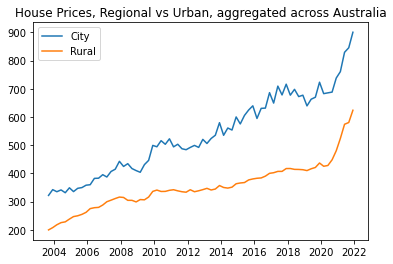

In [19]:
fix, ax = plt.subplots()
ax.plot(aggregate_df.index,aggregate_df['cities'])
ax.plot(aggregate_df.index,aggregate_df['rural'])

ax.set_title('House Prices, Regional vs Urban, aggregated across Australia')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.legend(["City","Rural"])

plt.savefig("Output/House Prices Over Time.png")
plt.show()


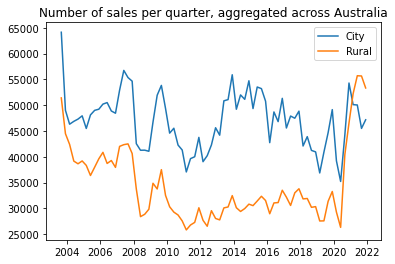

In [5]:
fix, ax = plt.subplots()
ax.plot(aggregate_df.index,aggregate_df['cities_cnt'])
ax.plot(aggregate_df.index,aggregate_df['rural_cnt'])

ax.set_title('Number of sales per quarter, aggregated across Australia')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.legend(["City","Rural"])
plt.savefig("Output/House Sales Number Over Time.png")
plt.show()

For Cities: Gradient is 0.28362884713412045 during covid, p = 0.0010848067461497394
For Regional: Gradient is 0.28818613440709745 during covid, p = 5.98702361919472e-05


C:\Users\Liam\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


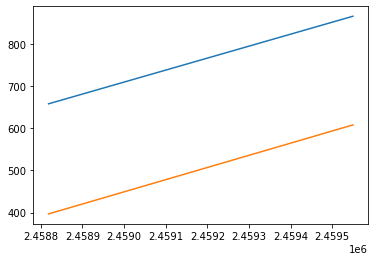

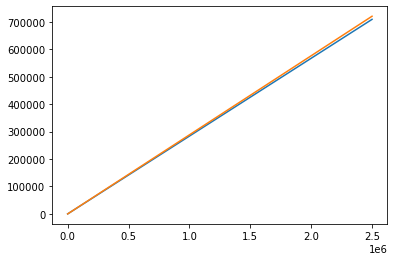

In [6]:
#datetime to numeric encoder
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day


In [3]: to_integer(datetime.date(2012, 6, 13))


covid_stats_df = aggregate_df.loc[aggregate_df.index >= datetime.datetime(2019,12,1)]
covid_stats_df['utc_timestamp'] = covid_stats_df.index.to_julian_date()
city_slope, city_intercept, city_r, city_p, se = st.linregress(covid_stats_df["utc_timestamp"], covid_stats_df["cities"])
reg_slope, reg_intercept, reg_r, reg_p, se = st.linregress(covid_stats_df["utc_timestamp"], covid_stats_df["rural"])

print(f"For Cities: Gradient is {city_slope} during covid, p = {city_p}")
print(f"For Regional: Gradient is {reg_slope} during covid, p = {reg_p}")

city_y = covid_stats_df["utc_timestamp"]*city_slope + city_intercept
reg_y = covid_stats_df["utc_timestamp"]*reg_slope + reg_intercept
covid_stats_df
fix,ax = plt.subplots()
ax.plot(covid_stats_df["utc_timestamp"], city_y)
ax.plot(covid_stats_df["utc_timestamp"], reg_y)

x = np.linspace(0,2.5e+6,50)
city_y = x*city_slope
reg_y = reg_slope*x
fix,ax = plt.subplots()
ax.plot(x,city_y)
ax.plot(x,reg_y)

In [7]:
# Aggregating data for indiviual cities, and individual rural areas to create seperate dataframes 


# Sydney and NSW data frame
aggregate_syd_df = pd.DataFrame()
aggregate_syd_df['Sydney'] = (clean_df["Median Price Sydney"]*clean_df["Number of Established House Transfers Sydney"]) / (
                                clean_df["Number of Established House Transfers Sydney"])

aggregate_nsw_df = pd.DataFrame()
aggregate_nsw_df['Rest of NSW'] = (clean_df["Median Price Rest of NSW"]*clean_df["Number of Established House Transfers Rest of NSW"]) / (
                                    clean_df["Number of Established House Transfers Rest of NSW"])

# Melbourne and VIC data frame
aggregate_melb_df = pd.DataFrame()
aggregate_melb_df['Melbourne'] = (clean_df["Median Price Melbourne"]*clean_df["Number of Established House Transfers Melbourne"]) / (
                                    clean_df["Number of Established House Transfers Melbourne"])

aggregate_vic_df = pd.DataFrame()
aggregate_vic_df['Rest of Vic'] = (clean_df["Median Price Rest of Vic."]*clean_df["Number of Established House Transfers Rest of Vic."]) / (
                                    clean_df["Number of Established House Transfers Rest of Vic."])

# Bisbane and QLD data frame
aggregate_bris_df = pd.DataFrame()
aggregate_bris_df['Brisbane'] = (clean_df["Median Price Brisbane"]*clean_df["Number of Established House Transfers Brisbane"]) / (
                                    clean_df["Number of Established House Transfers Brisbane"])

aggregate_qld_df = pd.DataFrame()
aggregate_qld_df['Rest of Queensland'] = (clean_df["Median Price Rest of Qld."]*clean_df["Number of Established House Transfers Rest of Qld."]) / (
                                            clean_df["Number of Established House Transfers Rest of Qld."])

# Adeliade and SA data frame
aggregate_adel_df = pd.DataFrame()
aggregate_adel_df['Adelaide'] = (clean_df["Median Price Adelaide"]*clean_df["Number of Established House Transfers Adelaide"]) / (
                                    clean_df["Number of Established House Transfers Adelaide"])

aggregate_sa_df = pd.DataFrame()
aggregate_sa_df['Rest of SA'] = (clean_df["Median Price Rest of SA"]*clean_df["Number of Established House Transfers Rest of SA"]) / (
                                    clean_df["Number of Established House Transfers Rest of SA"])

# Perth and WA data frame
aggregate_per_df = pd.DataFrame()
aggregate_per_df['Perth'] = (clean_df["Median Price Perth"]*clean_df["Number of Established House Transfers Perth"]) / (
                                clean_df["Number of Established House Transfers Perth"])

aggregate_wa_df = pd.DataFrame()
aggregate_wa_df['Rest of WA'] = (clean_df["Median Price Rest of WA"]*clean_df["Number of Established House Transfers Rest of WA"]) / (
                                    clean_df["Number of Established House Transfers Rest of WA"])

# Hobart and TAS data rame
aggregate_hob_df = pd.DataFrame()
aggregate_hob_df['Hobart'] = (clean_df["Median Price Hobart"]*clean_df["Number of Established House Transfers Hobart"]) / (
                                clean_df["Number of Established House Transfers Hobart"])

aggregate_tas_df = pd.DataFrame()
aggregate_tas_df['Rest of Tas'] = (clean_df["Median Price Rest of Tas."]*clean_df["Number of Established House Transfers Rest of Tas."]) / (
                                    clean_df["Number of Established House Transfers Rest of Tas."])

# Darwin and NT data frame
aggregate_dar_df = pd.DataFrame()
aggregate_dar_df['Darwin'] = (clean_df["Median Price Darwin"]*clean_df["Number of Established House Transfers Darwin"]) / (
                                clean_df["Number of Established House Transfers Darwin"])

aggregate_nt_df = pd.DataFrame()
aggregate_nt_df['Rest of NT'] = (clean_df["Median Price Rest of NT"]*clean_df["Number of Established House Transfers Rest of NT"]) / (
                                    clean_df["Number of Established House Transfers Rest of NT"])

In [8]:
# Test individual dataframe

aggregate_nt_df.head(10)

,Rest of NT
Date,
2003-09-01,195.0
2003-12-01,204.5
2004-03-01,217.8
2004-06-01,215.0
2004-09-01,227.5
2004-12-01,227.0
2005-03-01,231.0
2005-06-01,230.0
2005-09-01,232.0


In [9]:
# set up date range for our bar charts - 2018 and 2021


#2018
syd_2018_df = aggregate_syd_df[aggregate_syd_df.index.year == 2018]
nsw_2018_df = aggregate_nsw_df[aggregate_nsw_df.index.year == 2018]

melb_2018_df = aggregate_melb_df[aggregate_melb_df.index.year == 2018]
vic_2018_df = aggregate_vic_df[aggregate_vic_df.index.year == 2018]

adel_2018_df = aggregate_adel_df[aggregate_adel_df.index.year == 2018]
sa_2018_df = aggregate_sa_df[aggregate_sa_df.index.year == 2018]

bris_2018_df = aggregate_bris_df[aggregate_bris_df.index.year == 2018]
qld_2018_df = aggregate_qld_df[aggregate_qld_df.index.year == 2018]

per_2018_df = aggregate_per_df[aggregate_per_df.index.year == 2018]
wa_2018_df = aggregate_wa_df[aggregate_wa_df.index.year == 2018]

hob_2018_df = aggregate_hob_df[aggregate_hob_df.index.year == 2018]
tas_2018_df = aggregate_tas_df[aggregate_tas_df.index.year == 2018]

nt_2018_df = aggregate_nt_df[aggregate_nt_df.index.year == 2018]
dar_2018_df = aggregate_dar_df[aggregate_dar_df.index.year == 2018]

#2021
syd_2021_df = aggregate_syd_df[aggregate_syd_df.index.year == 2021]
nsw_2021_df = aggregate_nsw_df[aggregate_nsw_df.index.year == 2021]

melb_2021_df = aggregate_melb_df[aggregate_melb_df.index.year == 2021]
vic_2021_df = aggregate_vic_df[aggregate_vic_df.index.year == 2021]

adel_2021_df = aggregate_adel_df[aggregate_adel_df.index.year == 2021]
sa_2021_df = aggregate_sa_df[aggregate_sa_df.index.year == 2021]

bris_2021_df = aggregate_bris_df[aggregate_bris_df.index.year == 2021]
qld_2021_df = aggregate_qld_df[aggregate_qld_df.index.year == 2021]

per_2021_df = aggregate_per_df[aggregate_per_df.index.year == 2021]
wa_2021_df = aggregate_wa_df[aggregate_wa_df.index.year == 2021]

hob_2021_df = aggregate_hob_df[aggregate_hob_df.index.year == 2021]
tas_2021_df = aggregate_tas_df[aggregate_tas_df.index.year == 2021]

nt_2021_df = aggregate_nt_df[aggregate_nt_df.index.year == 2021]
dar_2021_df = aggregate_dar_df[aggregate_dar_df.index.year == 2021]

# test dataframe

nt_2018_df.head()

,Rest of NT
Date,
2018-03-01,445.0
2018-06-01,453.5
2018-09-01,417.0
2018-12-01,452.5


In [10]:
# merge 2018 and 2021 dataframes for regional areas

total_regional_2018_df = [nsw_2018_df, vic_2018_df, sa_2018_df, qld_2018_df, wa_2018_df, tas_2018_df, nt_2018_df]

df_regional_2018_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), total_regional_2018_df).fillna('void')

total_regional_2021_df = [nsw_2021_df, vic_2021_df, sa_2021_df, qld_2021_df, wa_2021_df, tas_2021_df, nt_2021_df]

df_regional_2021_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), total_regional_2021_df).fillna('void')

res_df_2018 = pd.DataFrame(df_regional_2018_merged.mean())

rural_df = pd.concat([df_regional_2018_merged,df_regional_2021_merged])


rural_df["Year"] = rural_df.index.year
rural_df = rural_df.groupby("Year")
rural_df = rural_df.mean()


In [11]:
# merge 2018 and 2021 dataframes for city areas

total_city_2018_df = [melb_2018_df, syd_2018_df, bris_2018_df, adel_2018_df, per_2018_df, hob_2018_df, dar_2018_df]

df_city_2018_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), total_city_2018_df).fillna('void')

total_city_2021_df = [melb_2021_df, syd_2021_df, bris_2021_df, adel_2021_df, per_2021_df, hob_2021_df, dar_2021_df]

df_city_2021_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), total_city_2021_df).fillna('void')

city_df = pd.concat([df_city_2018_merged,df_city_2021_merged])


city_df["Year"] = city_df.index.year
city_df = city_df.groupby("Year")
city_df = city_df.mean()
city_df.transpose().keys()

Int64Index([2018, 2021], dtype='int64', name='Year')

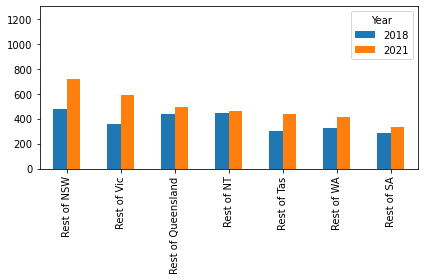

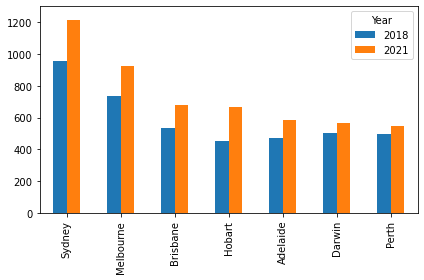

In [21]:

rural_df2 = rural_df.transpose().sort_values(by = np.int64(2021), ascending=False)
rural_df2.plot(kind = "bar",  ylim = (0,1300))
plt.tight_layout()
plt.savefig("Output/Rural Bar Chart.png")
plt.show()

city_df2 = city_df.transpose().sort_values(by = np.int64(2021), ascending=False)
city_df2.plot(kind="bar", ylim = (0,1300))
plt.tight_layout()
plt.savefig("Output/City Bar Chart.png")
plt.show()


In [13]:
#Calculate an increase/decrease of each state in overall average sales price

vic_sales= pd.DataFrame((clean_df["Median Price Melbourne"]+ clean_df ["Median Price Rest of Vic."])/2)
nsw_sales = pd.DataFrame((clean_df["Median Price Sydney"]+ clean_df ["Median Price Rest of NSW"])/2)
qld_sales = pd.DataFrame((clean_df["Median Price Brisbane"]+ clean_df ["Median Price Rest of Qld."])/2)
sa_sales = pd.DataFrame((clean_df["Median Price Adelaide"]+ clean_df ["Median Price Rest of SA"])/2)
wa_sales = pd.DataFrame((clean_df["Median Price Perth"]+ clean_df ["Median Price Rest of WA"])/2)
nt_sales = pd.DataFrame((clean_df["Median Price Darwin"]+ clean_df ["Median Price Rest of NT"])/2)
tas_sales = pd.DataFrame((clean_df["Median Price Hobart"]+ clean_df ["Median Price Rest of Tas."])/2)
can_sales = pd.DataFrame((clean_df["Median Price Canberra"]))

In [14]:
#rename each columns name & adding into one dataframe for the whole Australia 

vic_sales_rename = vic_sales.rename (columns = {0: "VIC Mean Sales"})
nsw_sales_rename = nsw_sales.rename (columns = {0: "NSW Mean Sales"})
qld_sales_rename = qld_sales.rename (columns = {0: "QLD Mean Sales"})
sa_sales_rename = sa_sales.rename (columns = {0: "SA Mean Sales"})
wa_sales_rename = wa_sales.rename (columns = {0: "WA Mean Sales"})
nt_sales_rename = nt_sales.rename (columns = {0: "NT Mean Sales"})
tas_sales_rename = nt_sales.rename (columns = {0: "TAS Mean Sales"})
can_sales_rename = can_sales.rename (columns = {0: "CAN Mean Sales"})
aus_sales = vic_sales_rename. join(nsw_sales_rename).join(qld_sales_rename).join(sa_sales_rename).join(wa_sales_rename).join(nt_sales_rename).join(tas_sales_rename).join(can_sales_rename)
aus_sales

,VIC Mean Sales,NSW Mean Sales,QLD Mean Sales,SA Mean Sales,WA Mean Sales,NT Mean Sales,TAS Mean Sales,Median Price Canberra
Date,,,,,,,,
2003-09-01,235.50,363.65,233.00,192.50,198.0,204.50,204.50,360.0
2003-12-01,252.50,387.50,250.70,204.75,207.0,215.25,215.25,375.0
2004-03-01,247.50,394.00,263.35,208.30,216.5,228.65,228.65,375.0
2004-06-01,251.25,384.00,270.00,213.25,220.0,231.90,231.90,375.0
2004-09-01,248.50,387.50,274.50,218.00,222.0,236.25,236.25,352.5
...,...,...,...,...,...,...,...,...
2020-12-01,624.50,782.50,517.50,410.65,456.0,466.25,466.25,788.0
2021-03-01,699.00,845.00,539.35,417.50,472.5,497.75,497.75,830.0
2021-06-01,749.00,960.00,568.00,447.50,485.0,516.65,516.65,901.5


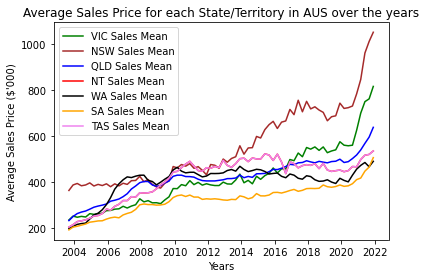

In [22]:
#adding into the plot
plt.plot ( vic_sales_rename, color="green", label= "VIC Sales Mean")
plt.plot ( nsw_sales_rename, color="brown", label= "NSW Sales Mean")
plt.plot ( qld_sales_rename, color="blue", label= "QLD Sales Mean")
plt.plot ( nt_sales_rename, color="red", label= "NT Sales Mean")
plt.plot ( wa_sales_rename, color="black", label= "WA Sales Mean")
plt.plot ( sa_sales_rename, color="orange", label= "SA Sales Mean")
plt.plot ( tas_sales_rename, color="violet", label= "TAS Sales Mean")
#plt.plot ( can_sales_rename, color="pink", label= "CAN Sales Mean")

plt.legend(loc="best")

plt.title("Average Sales Price for each State/Territory in AUS over the years")
plt.xlabel("Years")
#plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.ylabel("Average Sales Price ($'000)")

plt.tight_layout
plt.savefig("Output/Monthly Median Sales Price Per State.png")
plt.show()

question 5. What was the increase in median housing prices per state due to Covid19

In [16]:
#Sorting average sales for all Australia for 2018, 2019, 2020,2021:
aus_sales_pre_after_covid = aus_sales.loc[(aus_sales.index.year == 2019) |(aus_sales.index.year == 2018) |(aus_sales.index.year == 2020) |(aus_sales.index.year == 2021), :]
aus_sales_pre_after_covid

,VIC Mean Sales,NSW Mean Sales,QLD Mean Sales,SA Mean Sales,WA Mean Sales,NT Mean Sales,TAS Mean Sales,Median Price Canberra
Date,,,,,,,,
2018-03-01,543.0,717.50,487.50,372.50,424.00,472.50,472.50,698.5
2018-06-01,552.5,726.55,483.50,372.00,410.00,479.75,479.75,690.0
2018-09-01,537.5,712.50,490.00,373.15,403.25,458.50,458.50,700.0
2018-12-01,552.5,702.40,486.50,387.50,404.50,481.25,481.25,720.0
2019-03-01,527.5,666.00,483.50,380.00,410.00,452.25,452.25,690.0
2019-06-01,535.0,683.50,489.00,377.50,400.00,446.25,446.25,715.0
2019-09-01,540.0,687.50,490.50,380.75,394.00,449.50,449.50,676.0
2019-12-01,575.0,742.50,499.25,387.50,416.40,452.25,452.25,745.0
2020-03-01,560.0,719.50,485.00,381.50,407.25,445.00,445.00,720.8


In [17]:
#Calculate the average sales price per year for all Australia:
aus_sales_mean = aus_sales_pre_after_covid.groupby(aus_sales_pre_after_covid.index.year).mean()
aus_sales_mean.head()

,VIC Mean Sales,NSW Mean Sales,QLD Mean Sales,SA Mean Sales,WA Mean Sales,NT Mean Sales,TAS Mean Sales,Median Price Canberra
Date,,,,,,,,
2018,546.375,714.7375,486.8750,376.2875,410.4375,473.0000,473.0000,702.125
2019,544.375,694.8750,490.5625,381.4375,405.1000,450.0625,450.0625,706.500
2020,575.500,738.6875,498.2500,392.2000,423.5625,457.1250,457.1250,746.075
2021,756.000,966.2500,584.9625,459.0375,478.5000,517.3500,517.3500,930.875


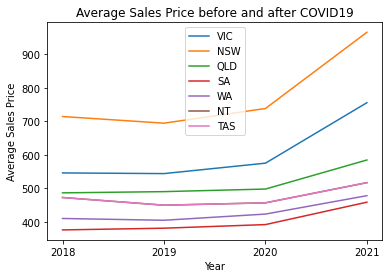

In [18]:
#adding into the plot

plt.plot (aus_sales_mean["VIC Mean Sales"], label = "VIC")
plt.plot (aus_sales_mean["NSW Mean Sales"], label = "NSW")
plt.plot (aus_sales_mean["QLD Mean Sales"], label = "QLD")
plt.plot (aus_sales_mean["SA Mean Sales"], label = "SA")
plt.plot (aus_sales_mean["WA Mean Sales"], label = "WA")
plt.plot (aus_sales_mean["NT Mean Sales"], label = "NT")
plt.plot (aus_sales_mean["TAS Mean Sales"], label = "TAS")

plt.legend(loc="best")

plt.title("Average Sales Price before and after COVID19")
plt.xlabel("Year")
plt.ylabel("Average Sales Price")
plt.xticks([2018,2019,2020,2021])
plt.tight_layout
plt.savefig("Output/Annual Average of Mean Sales Price Focused Around COVID.png")
plt.show()